### Import Libraries 

In [1]:
#For Data Manipulation
import pandas as pd
import numpy as np
#For Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Import and Read data

In [2]:
df = pd.read_csv('supermarket_sales.csv')
df.head(4)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [4]:
df.shape

(1000, 17)

In [5]:
df.duplicated().sum()

0

In [6]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


### Fixed Date,remove unwanted columns and save to analyse in MySQL 

In [7]:
#Fixed Date column
df['Date'] = pd.to_datetime(df['Date']).dt.strftime('%d-%m-%y')

In [8]:
df.head(4)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,05-01-19,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,08-03-19,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,03-03-19,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,27-01-19,20:33,Ewallet,465.76,4.761905,23.2880,8.4


In [9]:
df['gross margin percentage'].unique()
# we can see 'gross margin percentage' has no informason that we can use in our analysis

array([4.76190476])

In [10]:
df.drop(columns= ['Invoice ID','Time','gross margin percentage'], inplace= True)

In [11]:
df.head(5)

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Payment,cogs,gross income,Rating
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,05-01-19,Ewallet,522.83,26.1415,9.1
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,08-03-19,Cash,76.40,3.8200,9.6
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,03-03-19,Credit card,324.31,16.2155,7.4
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,27-01-19,Ewallet,465.76,23.2880,8.4
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,08-02-19,Ewallet,604.17,30.2085,5.3


In [12]:
df.to_csv('soping_mall_sql.csv')

### Chak Null values and prepair data for visualization

In [13]:
df.isnull().sum()

Branch           0
City             0
Customer type    0
Gender           0
Product line     0
Unit price       0
Quantity         0
Tax 5%           0
Total            0
Date             0
Payment          0
cogs             0
gross income     0
Rating           0
dtype: int64

In [14]:
# analyse Gender
df['Gender'].value_counts()

Female    501
Male      499
Name: Gender, dtype: int64

## Creat dummies for Gender column for getting numaric data for seaborn bar plot

In [15]:
Gender_data = pd.get_dummies(df['Gender'])
Gender_data.head(4)

,Female,Male
0,1,0
1,1,0
2,0,1
3,0,1


## Joining two data frame

In [16]:
df = pd.concat([df,Gender_data], axis= 1)
df.head(4)

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Payment,cogs,gross income,Rating,Female,Male
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,05-01-19,Ewallet,522.83,26.1415,9.1,1,0
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,08-03-19,Cash,76.40,3.8200,9.6,1,0
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,03-03-19,Credit card,324.31,16.2155,7.4,0,1
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,27-01-19,Ewallet,465.76,23.2880,8.4,0,1


### Start visualization

<AxesSubplot:title={'center':'Female Castomers spendaing'}, xlabel='Product line', ylabel='Female'>

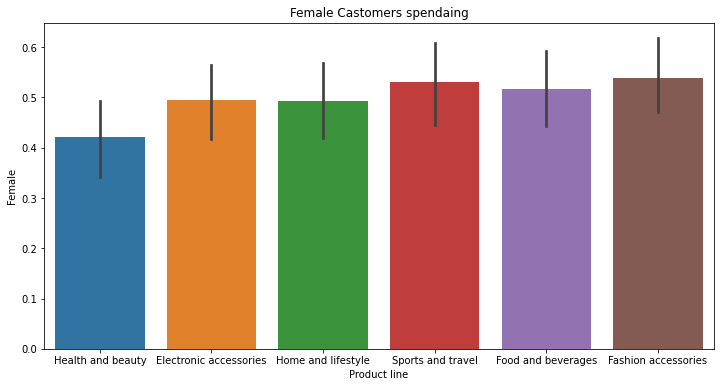

In [34]:
plt.figure(figsize= (12,6))
plt.title('Female Castomers spendaing')
sns.barplot(x= 'Product line', y= 'Female', data= df)

<AxesSubplot:title={'center':'Male Castomers spendaing'}, xlabel='Product line', ylabel='Male'>

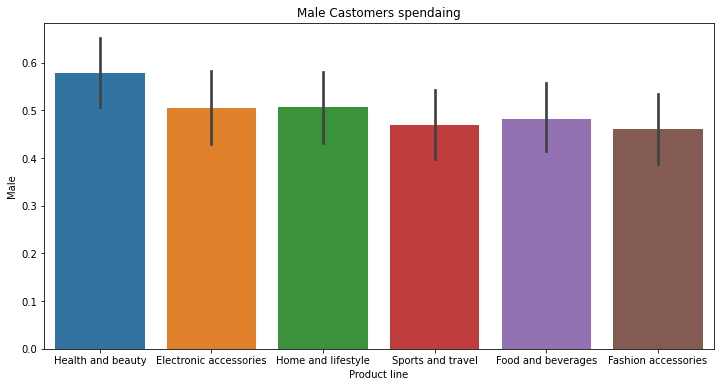

In [35]:
plt.figure(figsize= (12,6))
plt.title('Male Castomers spendaing')
sns.barplot(x= 'Product line', y= 'Male', data= df)

## Ploting Customers per city

In [19]:
city_df = pd.DataFrame(df['City'].value_counts())
city_df

,City
Yangon,340
Mandalay,332
Naypyitaw,328


Text(0.5, 1.0, 'Customer acquisition by city')

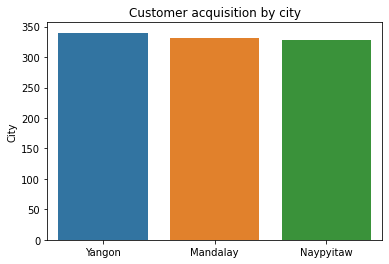

In [30]:
sns.barplot(x =city_df.index, y = city_df['City'])
plt.title('Customer acquisition by city')

## Plotting payment methods 

In [21]:
payment_df = pd.DataFrame(df['Payment'].value_counts())
payment_df

,Payment
Ewallet,345
Cash,344
Credit card,311


Text(0.5, 1.0, 'Analyse Payment Methods')

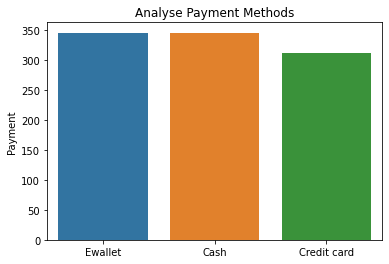

In [31]:
sns.barplot(x =payment_df.index, y = payment_df['Payment'])
plt.title('Analyse Payment Methods')

## Gross income plot for each product line

<AxesSubplot:title={'center':'Gross income plot for each product line'}, xlabel='Product line', ylabel='gross income'>

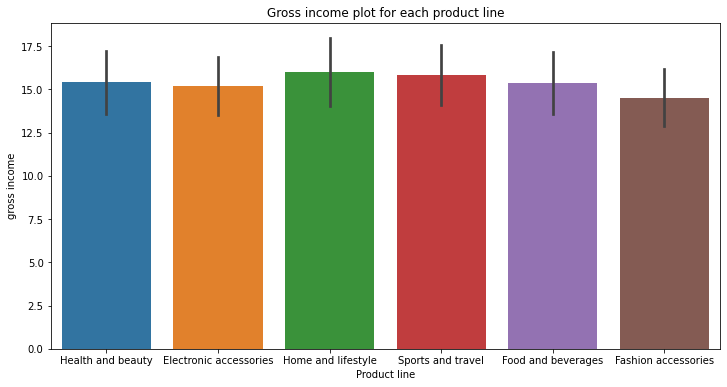

In [32]:
plt.figure(figsize= (12,6))
plt.title('Gross income plot for each product line')
sns.barplot(x= 'Product line', y= 'gross income', data= df)

## Gating Rating Plot for each product line

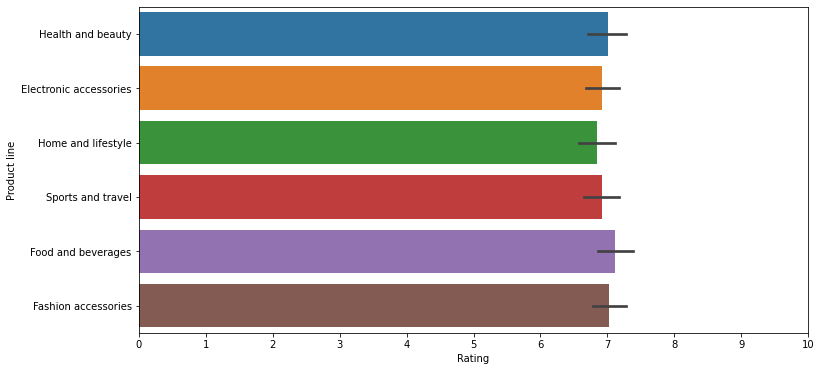

In [39]:
xdata = [0,1,2,3,4,5,6,7,8,9,10]
#plt.title('Gating Rating Plot for each product line')
plt.figure(figsize=(12,6))
sns.barplot(y= 'Product line', x= 'Rating', data= df)
plt.xticks(xdata)
plt.show()

## Total bill in each product line

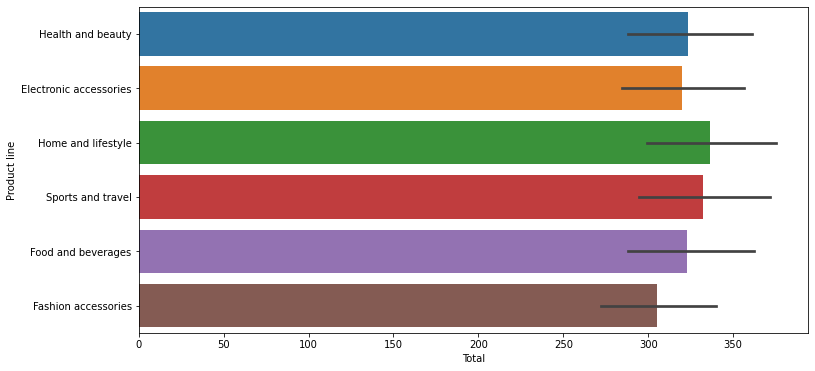

In [25]:
plt.figure(figsize=(12,6))
sns.barplot(x= 'Total', y= 'Product line', data= df)
plt.show()

## Explore Quantity Count

<Figure size 864x432 with 0 Axes>

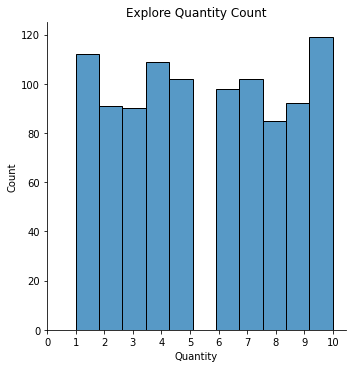

In [40]:
plt.figure(figsize=(12,6))
sns.displot(df['Quantity'])
plt.xticks(xdata)
plt.title('Explore Quantity Count')
plt.show()

In [27]:
Quantity_df = pd.DataFrame(df['Quantity'].value_counts())
Quantity_df

,Quantity
10,119
1,112
4,109
7,102
5,102
6,98
9,92
2,91
3,90
8,85


<AxesSubplot:title={'center':'Explore Quantity Count'}, ylabel='Quantity'>

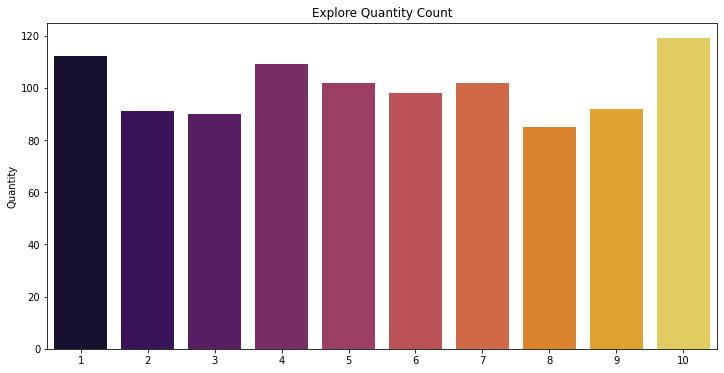

In [41]:
plt.figure(figsize=(12,6))
plt.title('Explore Quantity Count')
sns.barplot(x= Quantity_df.index, y= Quantity_df['Quantity'], palette= 'inferno' )

<AxesSubplot:>

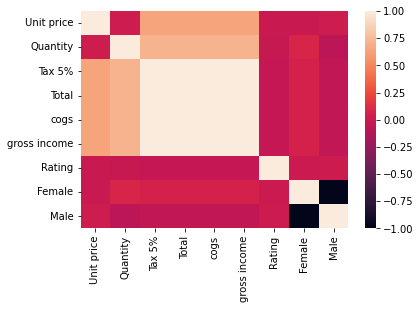

In [29]:
sns.heatmap(df.corr())